<a href="https://colab.research.google.com/github/Elwing-Chou/ximen_day_0709/blob/main/3_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import urllib.request as req
url = "https://github.com/Elwing-Chou/ximen_day_0709/raw/main/titanic/train.csv"
req.urlretrieve(url, "train.csv")
url = "https://github.com/Elwing-Chou/ximen_day_0709/raw/main/titanic/test.csv"
req.urlretrieve(url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x7c5376fd18a0>)

In [59]:
import pandas as pd
train = pd.read_csv("train.csv", encoding="utf-8")
test = pd.read_csv("test.csv", encoding="utf-8")

In [60]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


1. 資料預處理

a. 填缺失值

i. 類別型: Pclass, Name, Sex, Cabin, Embarked

ii. 數值型: Age, SibSp, Parch, Fare, Ticket#

捕最可能的

i. 類別型: 最常出現!!

ii. 數值型: 中位數


b. 類別型: One-Hot Encoding

In [61]:
datas = pd.concat([train, test], axis=0)
datas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [62]:
datas = datas.drop(["PassengerId", "Survived"], axis=1)

In [63]:
# Everything is an object
# 每種東西都有形態, 每個型態都有自己可做的操作
# 字典型態: dict 操作: [key]
# 函式型態: print 操作: (3)
# a = int
# a(4.7)
# def func(mode):
#   if mode == 0:
#     return int
#   else:
#     return round
# func(1)(4.7)

In [64]:
# Series.apply(func)
# def func(n):
#   if n <= 1:
#     return 0
#   else:
#     return n ** 2
# s = pd.Series([1, 2, 3])
# s.apply(func)

In [65]:
# s = "Braund, Mr. Owen Harris"
# s.split(",")[-1].split(".")[0].strip()
def func(s):
  return s.split(",")[-1].split(".")[0].strip()
datas["Name"] = datas["Name"].apply(func)

In [66]:
def func(s):
  if pd.isna(s):
    return s
  else:
    return s[0]
datas["Cabin"] = datas["Cabin"].apply(func)

In [67]:
count = datas["Ticket"].value_counts()
def func(t):
  if pd.isna(t):
    return t
  else:
    return count[t]
datas["Ticket"] = datas["Ticket"].apply(func)

In [68]:
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C,C
2,3,Miss,female,26.0,0,0,1,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C,S
4,3,Mr,male,35.0,0,0,1,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,Mr,male,NaN,0,0,1,8.0500,NaN,S
414,1,Dona,female,39.0,0,0,3,108.9000,C,C
415,3,Mr,male,38.5,0,0,1,7.2500,NaN,S
416,3,Mr,male,NaN,0,0,1,8.0500,NaN,S


In [69]:
s = datas.isna().sum()
# 篩選: Series/DataFrame[跟你資料筆數依樣多的True/False]
fil = s > 0
s[fil]

Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [70]:
most = datas["Embarked"].value_counts().idxmax()
datas["Embarked"] = datas["Embarked"].fillna(most)

In [71]:
d = datas.dtypes
fil = d != "object"
num_columns = d[fil].drop("Pclass").index
med = datas[num_columns].median()
datas = datas.fillna(med)

In [72]:
# check na again
s = datas.isna().sum()
# 篩選: Series/DataFrame[跟你資料筆數依樣多的True/False]
fil = s > 0
s[fil]

Cabin    1014
dtype: int64

我的稱謂只保留幾個主要是美觀因素

其他 0 0 0 -> 一種補類別值的方式

In [77]:
# 只留多數的是為了美觀
reserved = datas["Name"].value_counts().index[:4]
def func(n):
  if n in reserved:
    return n
  else:
    return None
datas["Name"] = datas["Name"].apply(func)

In [80]:
pd.set_option('display.max_columns', 500)
datas = pd.get_dummies(datas)
# 針對Pclass做, 雖然可作可不做 但我都是過了 做比較好點
datas = pd.get_dummies(datas, columns=["Pclass"])

In [83]:
# 額外一步: 靠賽, 想辦法提供給更多的訊息
datas["Family"] = datas["SibSp"] + datas["Parch"]

In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datas_scaled = pd.DataFrame(scaler.fit_transform(datas),
               columns=datas.columns)

In [91]:
# d = pd.DataFrame([
#     ["a", "b"],
#     ["c", "d"],
#     ["e", "f"]
# ], index=[0, 1, 0])
# # iloc: 第幾列 loc: 列標籤
# d.loc[0]

In [94]:
x = datas.iloc[:len(train)]
x_predict = datas.iloc[len(train):]
x_scaled = datas_scaled.iloc[:len(train)]
x_predict_scaled = datas_scaled.iloc[len(train):]

In [95]:
y = train["Survived"]

In [100]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

for i in range(2, 30):
  clf = KNeighborsClassifier(n_neighbors=i)
  scores = cross_val_score(clf, x_scaled, y, cv=10)
  avg = np.average(scores)
  print(i, ":", avg)

2 : 0.7901747815230962
3 : 0.8193757802746566
4 : 0.8058801498127341
5 : 0.8170786516853932
6 : 0.8227091136079899
7 : 0.832796504369538
8 : 0.8136828963795256
9 : 0.8125842696629213
10 : 0.8058676654182271
11 : 0.818214731585518
12 : 0.8069787765293384
13 : 0.8137203495630463
14 : 0.8125842696629213
15 : 0.8227215980024967
16 : 0.8137203495630463
17 : 0.8193508114856429
18 : 0.8137203495630461
19 : 0.8137203495630463
20 : 0.8170536828963794
21 : 0.8136953807740325
22 : 0.8148064918851435
23 : 0.8148064918851435
24 : 0.8147940074906368
25 : 0.8136828963795256
26 : 0.8091885143570536
27 : 0.8058676654182273
28 : 0.8069538077403247
29 : 0.8058426966292135


In [106]:
# 其實7就可以, 但最高是11
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_scaled, y)
pre = clf.predict(x_predict_scaled)
pd.DataFrame({
    "PassengerId":test["PassengerId"],
    "Survived":pre
}).to_csv("titanic_knn.csv", encoding="utf-8", index=False)

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier()
params = {
    "max_depth":range(2, 7),
    "n_estimators":range(21, 40, 2)
}
cv = GridSearchCV(clf, params, cv=10, n_jobs=-1)
cv.fit(x, y)
print(cv.best_score_)
print(cv.best_params_)

0.8384019975031209
{'max_depth': 6, 'n_estimators': 35}


In [115]:
clf = RandomForestClassifier(max_depth=6, n_estimators=35)
clf.fit(x, y)
pre = clf.predict(x_predict)
pd.DataFrame({
    "PassengerId":test["PassengerId"],
    "Survived":pre
}).to_csv("titanic_rf.csv", encoding="utf-8", index=False)

[Text(0.5, 0.875, 'Pclass_1 <= 0.5\ngini = 0.487\nsamples = 551\nvalue = [517, 374]\nclass = Victim'),
 Text(0.25, 0.625, 'Pclass_2 <= 0.5\ngini = 0.451\nsamples = 424\nvalue = [444, 232]\nclass = Victim'),
 Text(0.125, 0.375, 'Name_Mr <= 0.5\ngini = 0.377\nsamples = 300\nvalue = [354, 119]\nclass = Victim'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Sex_female <= 0.5\ngini = 0.494\nsamples = 124\nvalue = [90, 113]\nclass = Survivor'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Fare <= 79.825\ngini = 0.449\nsamples = 127\nvalue = [73, 142]\nclass = Survivor'),
 Text(0.625, 0.375, 'Sex_female <= 0.5\ngini = 0.497\nsamples = 80\nvalue = [58, 67]\nclass = Survivor'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Ticket <= 5.5\ngini = 0.278\nsamples = 47\nvalue = [15, 75]\nclass = Survivor'),
 Text(0.8125, 0.125, '\n  (...)  \n

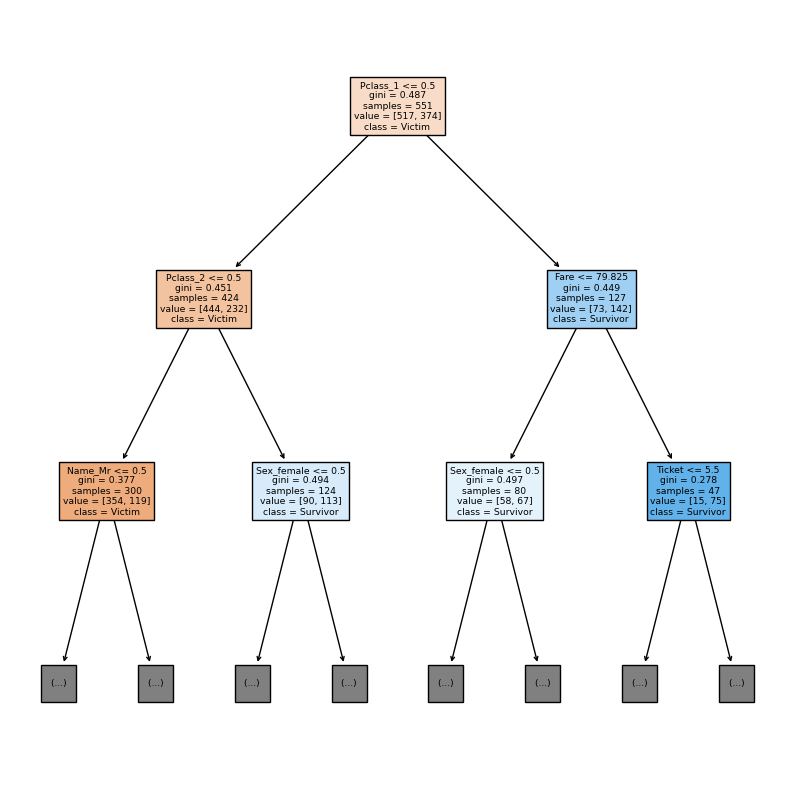

In [119]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=[10, 10])
# n_estimators=35 0-34
plot_tree(clf.estimators_[2],
     feature_names=x.columns,
     class_names=["Victim", "Survivor"],
     filled=True,
     max_depth=2)

In [123]:
s = pd.Series(clf.feature_importances_, index=x.columns)
s.sort_values(ascending=False)

Name_Mr        0.194616
Sex_female     0.177340
Fare           0.108264
Sex_male       0.092513
Age            0.059878
Ticket         0.059265
Family         0.051954
Pclass_3       0.050571
SibSp          0.027023
Pclass_1       0.026137
Name_Miss      0.024808
Name_Mrs       0.024559
Pclass_2       0.020672
Name_Master    0.019330
Embarked_C     0.012367
Parch          0.011809
Cabin_E        0.010564
Cabin_D        0.008400
Embarked_S     0.004650
Embarked_Q     0.004606
Cabin_C        0.004446
Cabin_B        0.003048
Cabin_A        0.001813
Cabin_F        0.001276
Cabin_T        0.000091
Cabin_G        0.000000
dtype: float64

<Axes: xlabel='Sex', ylabel='count'>

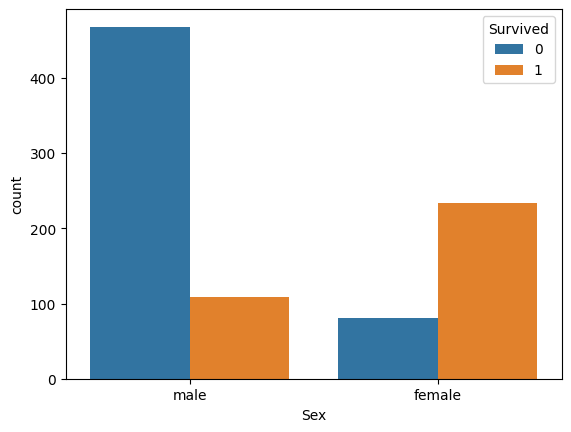

In [126]:
import seaborn as sns
sns.countplot(x=train["Sex"], hue=train["Survived"])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '(-0.512, 42.694]'),
  Text(1, 0, '(42.694, 85.388]'),
  Text(2, 0, '(85.388, 128.082]'),
  Text(3, 0, '(128.082, 170.776]'),
  Text(4, 0, '(170.776, 213.47]'),
  Text(5, 0, '(213.47, 256.165]'),
  Text(6, 0, '(256.165, 298.859]'),
  Text(7, 0, '(298.859, 341.553]'),
  Text(8, 0, '(341.553, 384.247]'),
  Text(9, 0, '(384.247, 426.941]'),
  Text(10, 0, '(426.941, 469.635]'),
  Text(11, 0, '(469.635, 512.329]')])

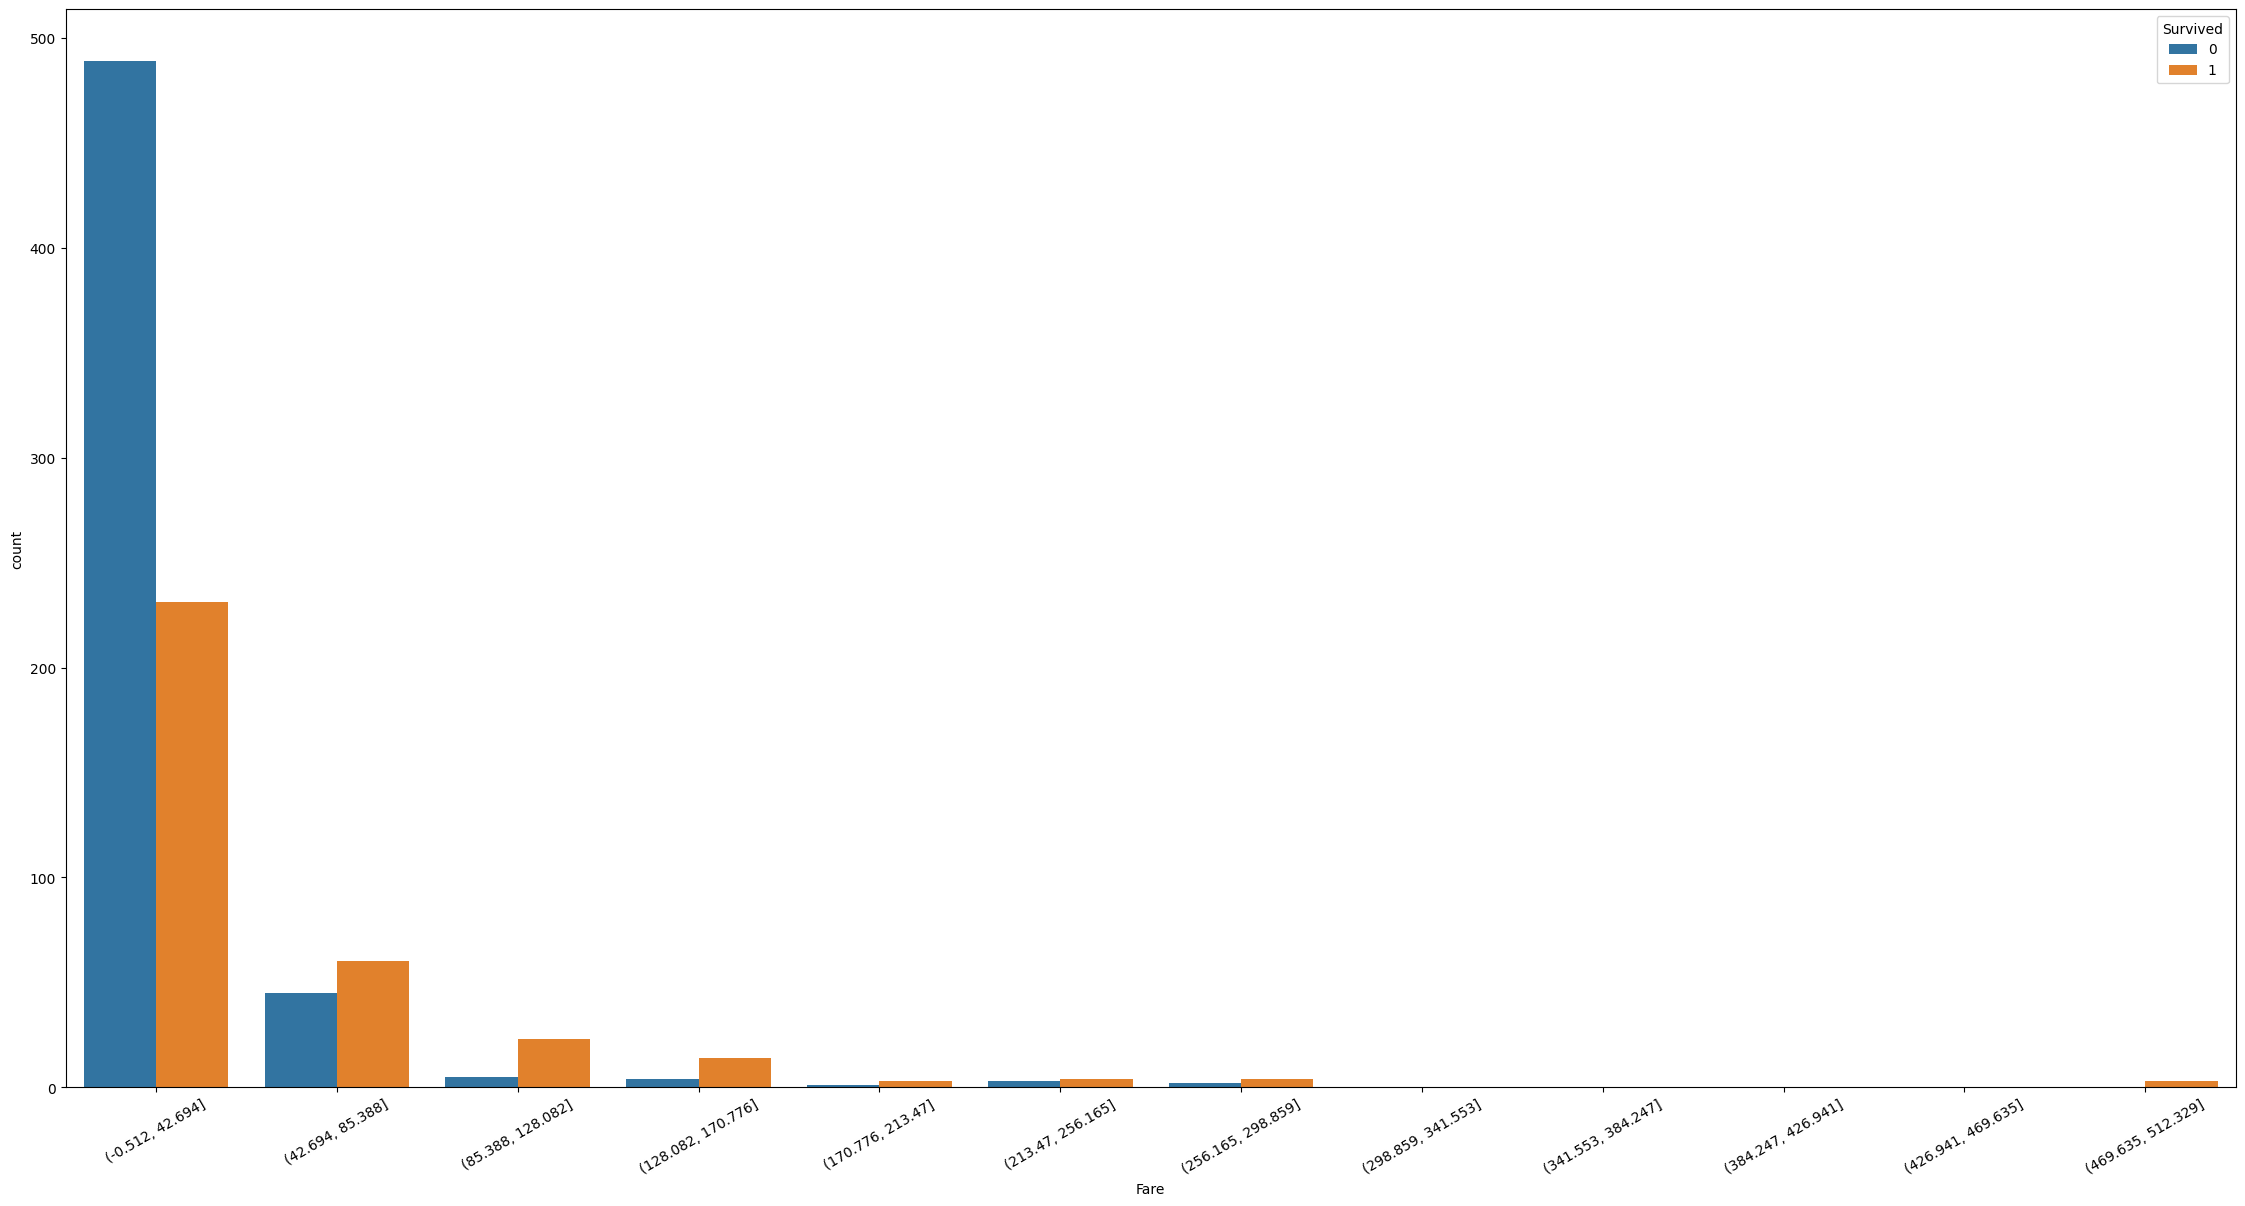

In [136]:
plt.figure(figsize=(28, 14))
c = pd.cut(train["Fare"], bins=12)
sns.countplot(x=c, hue=train["Survived"])
plt.xticks(rotation=30)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '(0.34, 7.052]'),
  Text(1, 0, '(7.052, 13.683]'),
  Text(2, 0, '(13.683, 20.315]'),
  Text(3, 0, '(20.315, 26.947]'),
  Text(4, 0, '(26.947, 33.578]'),
  Text(5, 0, '(33.578, 40.21]'),
  Text(6, 0, '(40.21, 46.842]'),
  Text(7, 0, '(46.842, 53.473]'),
  Text(8, 0, '(53.473, 60.105]'),
  Text(9, 0, '(60.105, 66.737]'),
  Text(10, 0, '(66.737, 73.368]'),
  Text(11, 0, '(73.368, 80.0]')])

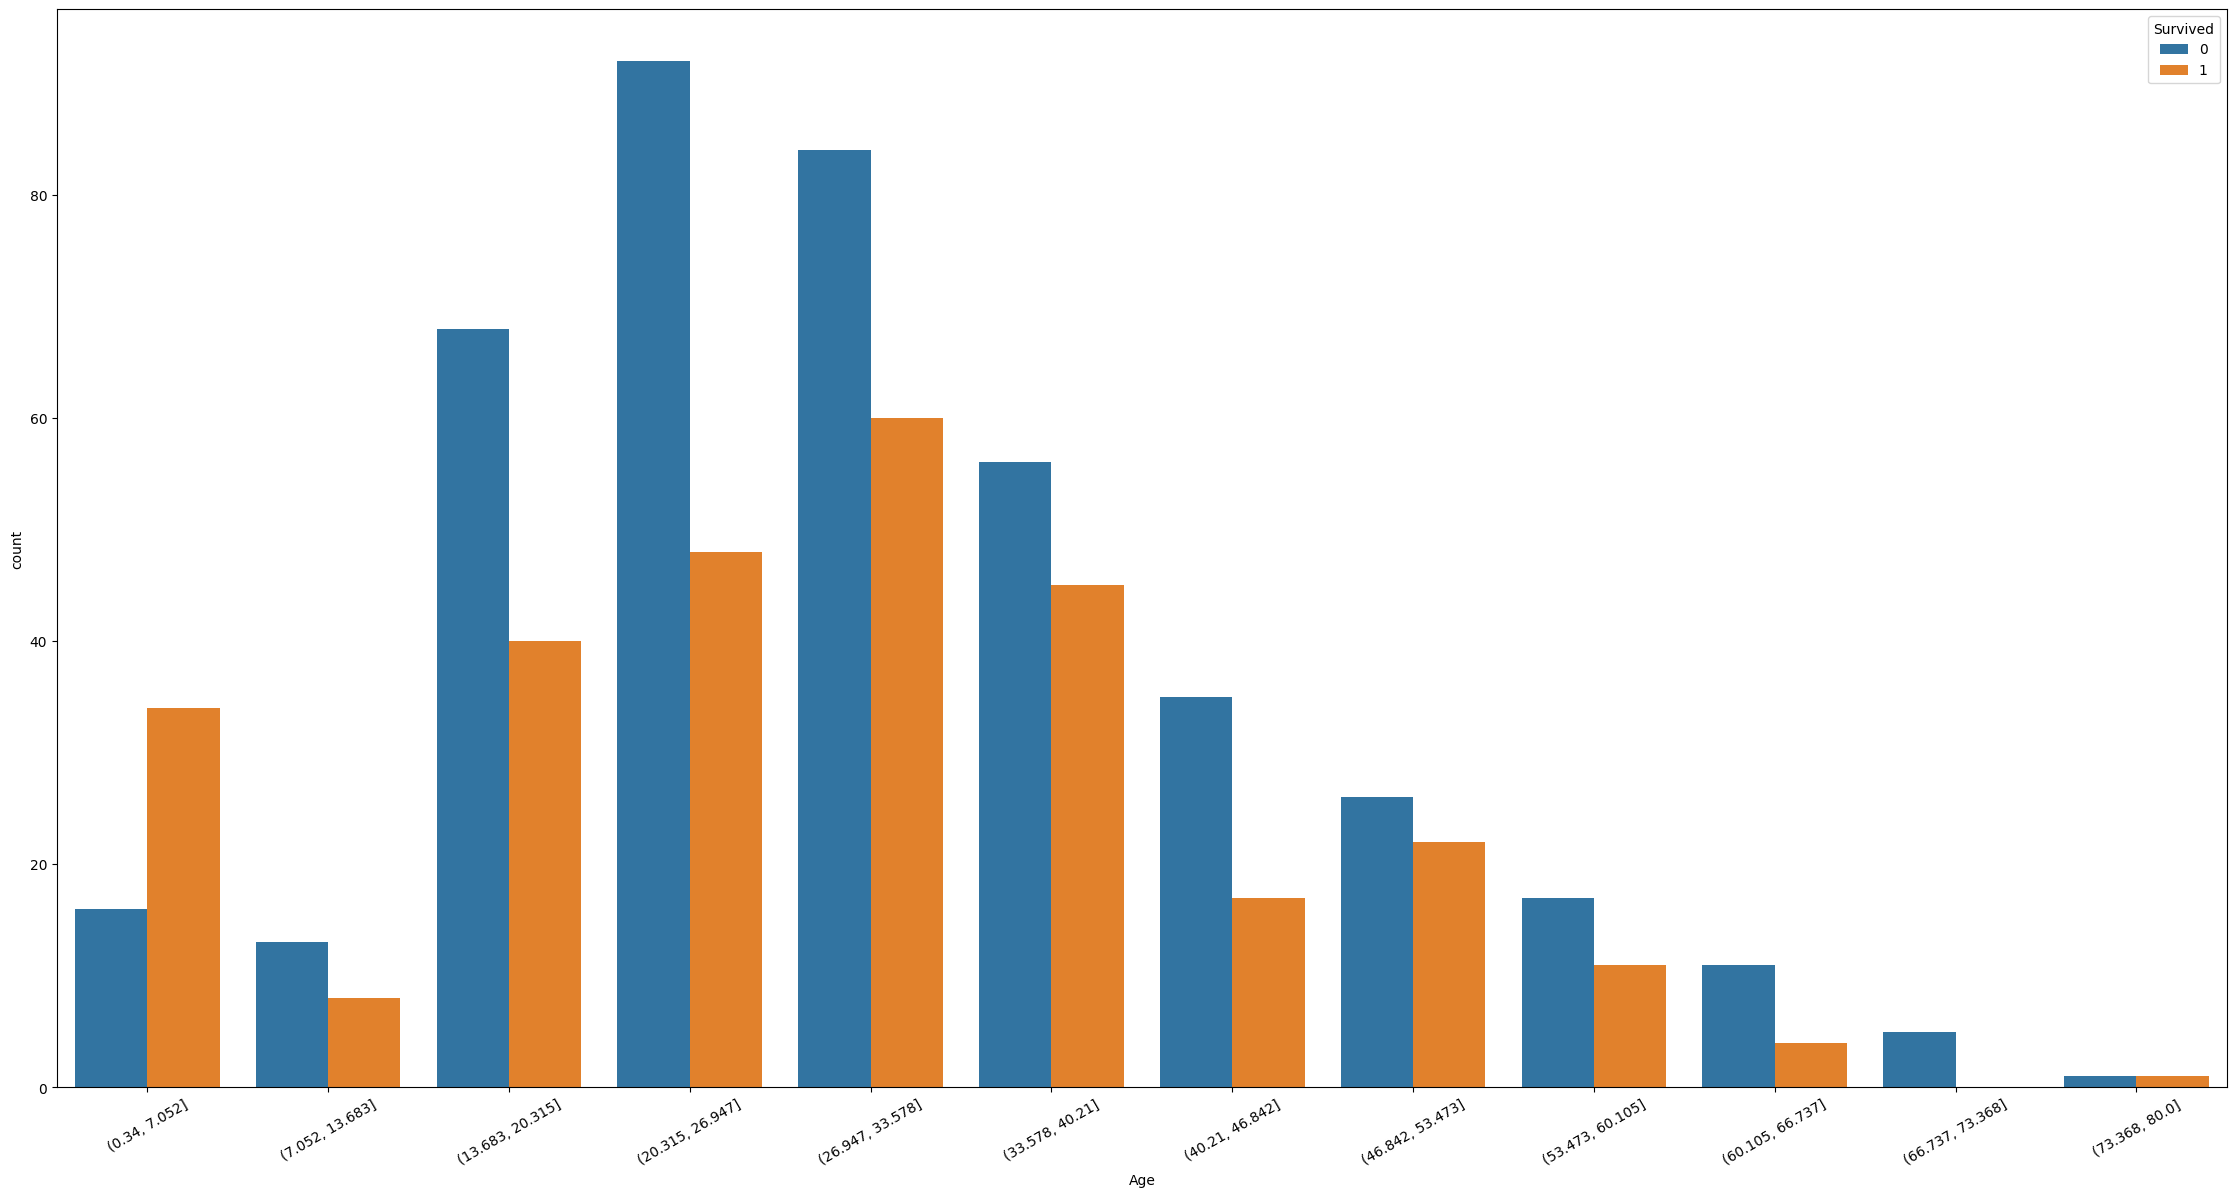

In [137]:
plt.figure(figsize=(28, 14))
c = pd.cut(train["Age"], bins=12)
sns.countplot(x=c, hue=train["Survived"])
plt.xticks(rotation=30)

In [143]:
# fil = (train["Age"] <= 1) & (train["Survived"] == 0)
# train[fil]